# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata,study_results, on = "Mouse ID" )

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
Mice_count= len(combined_data.value_counts('Mouse ID' ))
Mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates_Mouse = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicates_Mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_ID= duplicates_Mouse['Mouse ID'].unique()[0]
duplicate_data = combined_data[combined_data['Mouse ID'] == duplicates_ID]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
Cleaned_count= len(clean_data.value_counts('Mouse ID' ))
Cleaned_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Summarized_data = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
Summarized_data
mean= Summarized_data.mean()
Median= Summarized_data.median()
Variance= Summarized_data.var()
Standard_Deviation= Summarized_data.std()
SEM= Summarized_data.sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume':Median,
    'Tumor Volume Variance': Variance,
    'Tumor Volume Std. Dev.': Standard_Deviation,
    'Tumor Volume Std.Err.': SEM
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Var='var',
    Std='std',
    SEM='sem'
)
summary_df.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_df.columns])
summary_df

Tumor Volume (mm3)                                          
                           Mean     Median        Var       Std       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

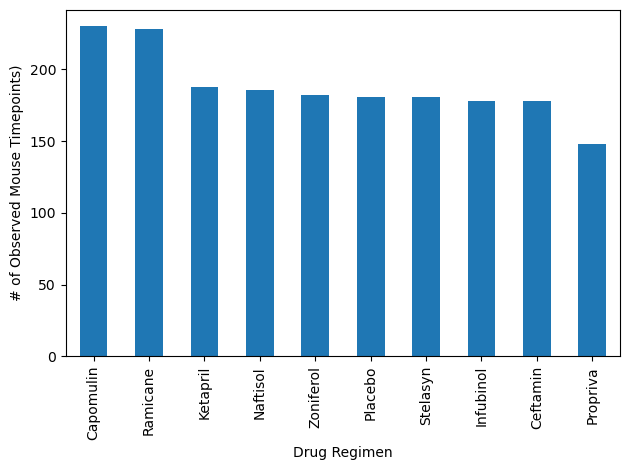

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
# Generate a bar plot
counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints)')
plt.tight_layout()  # Adjust layout to prevent label overlap

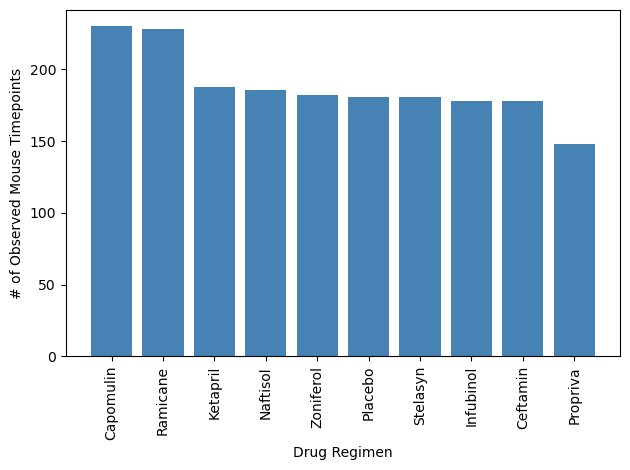

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.bar(counts.index, counts.values, color='steelblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to prevent label overlap

# Show the plot
plt.show()

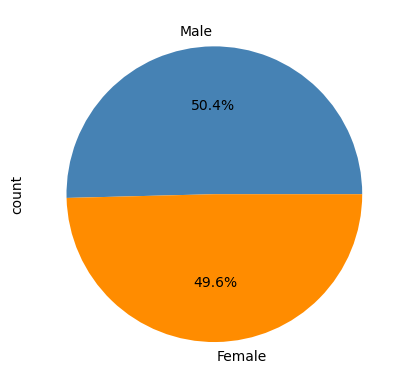

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
CountsByGender = unique_mice['Sex'].value_counts()

# Make the pie chart
CountsByGender.plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'darkorange'])
plt.ylabel('count')  # add the y-label

# Show the plot
plt.show()

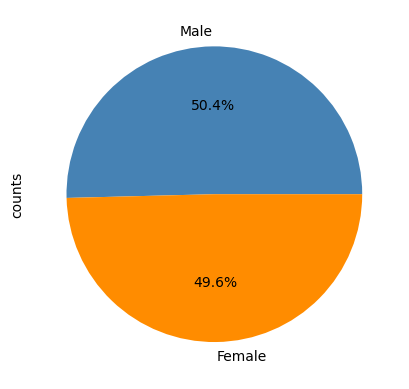

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['steelblue', 'darkorange'])
plt.ylabel('counts')  # Remove the y-label for a cleaner look

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame to include only the selected drug regimens
filtered_data = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(regimen_data)
    # Determine outliers using upper and lower bounds
    
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Step 3d: Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify outliers
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]

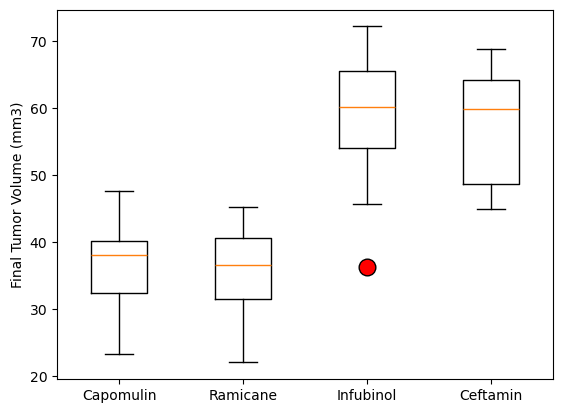

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
# Customize the box plot
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

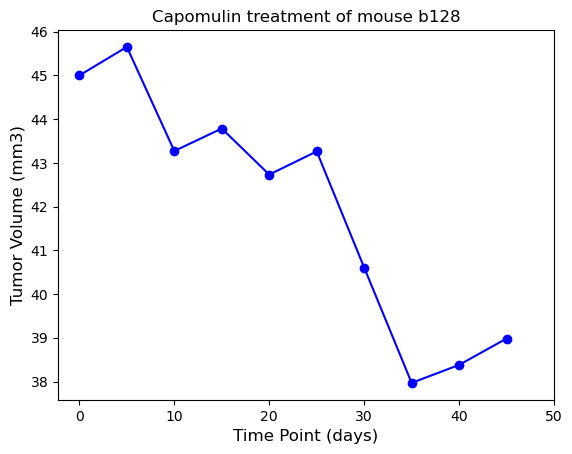

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin mouse id= b128
mouse_id = 'b128'  # Specify the mouse ID
capomulin_data = combined_data[(combined_data['Mouse ID'] == mouse_id) & (combined_data['Drug Regimen'] == 'Capomulin')]
#y_axis= range(capomulin_data['Timepoint'].min(),capomulin_data['Timepoint'].max(),1)
# Step 2: Generate the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue' )

# Customizing the plot
plt.title(f'Capomulin treatment of mouse {mouse_id}',fontsize=12)
plt.xlabel('Time Point (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# # Seting  x-ticks to increment by 10 points
plt.xticks(range(0, capomulin_data['Timepoint'].max() + 10, 10))  # X-ticks every 10 points

# Show the plot
plt.show()

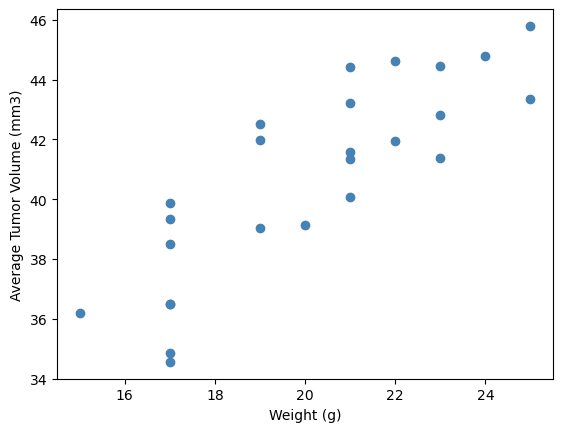

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter for Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse weight

average_tumor_volume = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean().reset_index()

# Create the scatter plotplt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='steelblue')

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

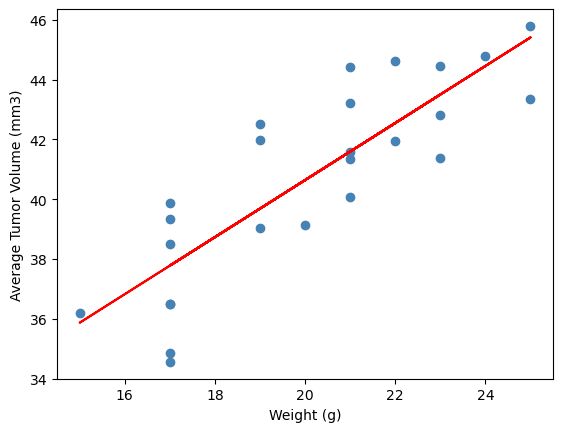

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Step 2: Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])[0, 1]

# Step 3: Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Step 4: Generate the regression line
regression_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Step 5: Plot the scatter plot and the regression line
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='steelblue')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, color='red', label=f'Linear Regression Line\n(y = {slope:.2f}x + {intercept:.2f})')

# Customize the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Show the plot
plt.show()


